In [92]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sympy as sp
sp.init_printing()

In [203]:
def clamp(value, minimum, maximum):
    if value < minimum:
        return minimum
    elif value > maximum:
        return maximu
    else:
        return value
    
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def comma_separated(x):
    s = '['
    for i in x:
        s+=str(i)
        s+=','
    return s[:len(s)-1] + ']'

In [214]:
def plot(func, intervals, tot_trials):
    x = np.array([i/intervals for i in range(0, intervals)])
    y = np.array([0 for i in range(0, intervals)])
    for i in range(tot_trials):
        r = func()
        y[int(r/(1/intervals))] += 1
    
    y = y*intervals/tot_trials
    # y = moving_average(y, 5)
    max_y = max(y)
    
    plt.plot(x[:len(y)], y)
    plt.xlim(0, 1-1/intervals)
    plt.ylim(0, max_y)
    plt.show()
    
    print(comma_separated(x))
    print()
    print(comma_separated(y))

In [489]:
def default_random():
    return random.random()

def default_tri():
    return random.triangular()

def squared():
    r = random.random()
    return r*r

def square_root():
    r = random.random()
    return math.sqrt(r)

def my_right_trapizuim(p1):
    '''The distribution of this function is P(x) = 2*(p1-1)*x + 2-p1
    where p1 is P(1)
    It's a very good approximation and nearly exact if p1 > 0.5'''
    r1 = random.random()
    _p1 = 1-p1
    return ((1-math.sqrt(r1))%_p1)*(1/_p1)

def custom_r():
    return my_right_trapizuim(0.1)

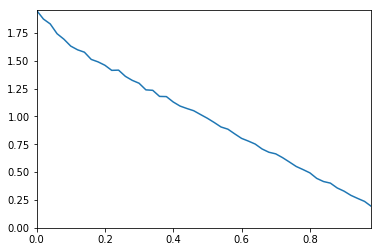

[0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98]

[1.9512,1.8734,1.8293,1.7416,1.6924,1.6305,1.5973,1.5758,1.511,1.4889,1.4586,1.4128,1.4148,1.3589,1.3232,1.2973,1.2378,1.2337,1.179,1.1774,1.129,1.0924,1.0705,1.0505,1.0163,0.9828,0.9449,0.9046,0.885,0.8429,0.8025,0.7781,0.7513,0.7075,0.6781,0.6636,0.6296,0.5905,0.5503,0.5224,0.493,0.4435,0.4151,0.401,0.3574,0.3288,0.2913,0.2634,0.2369,0.1919]


In [491]:
plot(custom_r, 50, 500000)